**Customer Personality Analysis and Prediction**

PHOTO 

ABSTRACT

This project aims to understand the costumers and choose the right products according to their past purchase history and their life style.

__A brief description of all columns in the dataset:__

#### People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

#### Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


### Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month


TABLE OF CONTENTS

column(variable) descriptions

Exploratory data analysis

Prior to loading datasets, all dependencies are imported

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading and inspecting dataset

The dataset used in this project can be found at [this link](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis).

In [117]:
df = pd.read_csv('marketing_campaign.csv', sep= "\t")

In [118]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Checking if there are missing or duplicate values

In [119]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

The variable *Income* has 24 empty cells. These are replaced by average income value. 

In [120]:
df['Income'].fillna(np.mean(df['Income']), inplace= True)

In [121]:
df.duplicated().sum()

0

In [122]:
pd.DataFrame(df.nunique()).sort_values(0).rename( {0: 'Unique Values'}, axis=1)

,Unique Values
Z_Revenue,1
Z_CostContact,1
Response,2
AcceptedCmp3,2
AcceptedCmp4,2
AcceptedCmp2,2
Complain,2
AcceptedCmp1,2
AcceptedCmp5,2
Kidhome,3


* Before proceeding, I dropped the columns 'Z_CostContact' and 'Z_Revenue', as they are constant and not useful for the purpose of this analysis.
* User ID & Regist Date is useless for classification & Segmentation task
* Year_Birth variable is changed to Age since it is more informative

In [123]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace = True)
df.drop(['ID', 'Dt_Customer'], axis=1, inplace=True)

df['Age'] = 2022 - df.Year_Birth.to_numpy()
df.drop('Year_Birth', axis = 1, inplace = True)

df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,0,1,65
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,68
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,10,4,0,0,0,0,0,0,0,57
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,4,6,0,0,0,0,0,0,0,38
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,6,5,0,0,0,0,0,0,0,41


* Response - AcceptedCmp5 are all **Binary Variables**.
* Marital_Status & Education can be seen as **Categorical Variable**.
* Kidhome & Teenhome are **Discrete Ordinal Variables**, for which have clear orders but not many different values.
* The rest 16 variables can be seen as **Continuous Variables**.

In [124]:
df['Marital_Status'].value_counts()
# Alone, Absurd and YOLO are categorized as Single.

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [125]:
df['Marital_Status'] = df['Marital_Status'].replace(['Alone','YOLO','Absurd'],'Single')

# Change unit to 1K $ 
df['Income'] = df['Income'] / 1000

In [126]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

* According to 'Three Cycle System' from the European Higher Education Area, **2n Cycle** is equal to **Master degree**.
* **Graduation** degree is the same as **Bachelor** in Europe. Thus, we adjust the education level of all customers.

In [127]:
df['Education'].replace(['2n Cycle', 'Graduation'], ['Master', 'Bachelor'], inplace=True)

In [128]:
#rearrange the columns 
temp_cols = df.columns.tolist()
temp_cols_new = temp_cols[-1:] + temp_cols[:-1]

df = df[temp_cols_new]



In [129]:
AcceptedCmp1 = df[['AcceptedCmp1']]
AcceptedCmp2 = df[['AcceptedCmp2']]
df = df.drop(columns=['AcceptedCmp1'])
df = df.drop(columns=['AcceptedCmp2'])
df.insert(loc=18, column='AcceptedCmp1', value=AcceptedCmp1)
df.insert(loc=19, column='AcceptedCmp2', value=AcceptedCmp2)


In [130]:
df.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
0,65,Bachelor,Single,58.138,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,68,Bachelor,Single,46.344,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,57,Bachelor,Together,71.613,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,38,Bachelor,Together,26.646,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,41,PhD,Married,58.293,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0


### Histograms

I created histograms (and KDEs) for all continous variables:

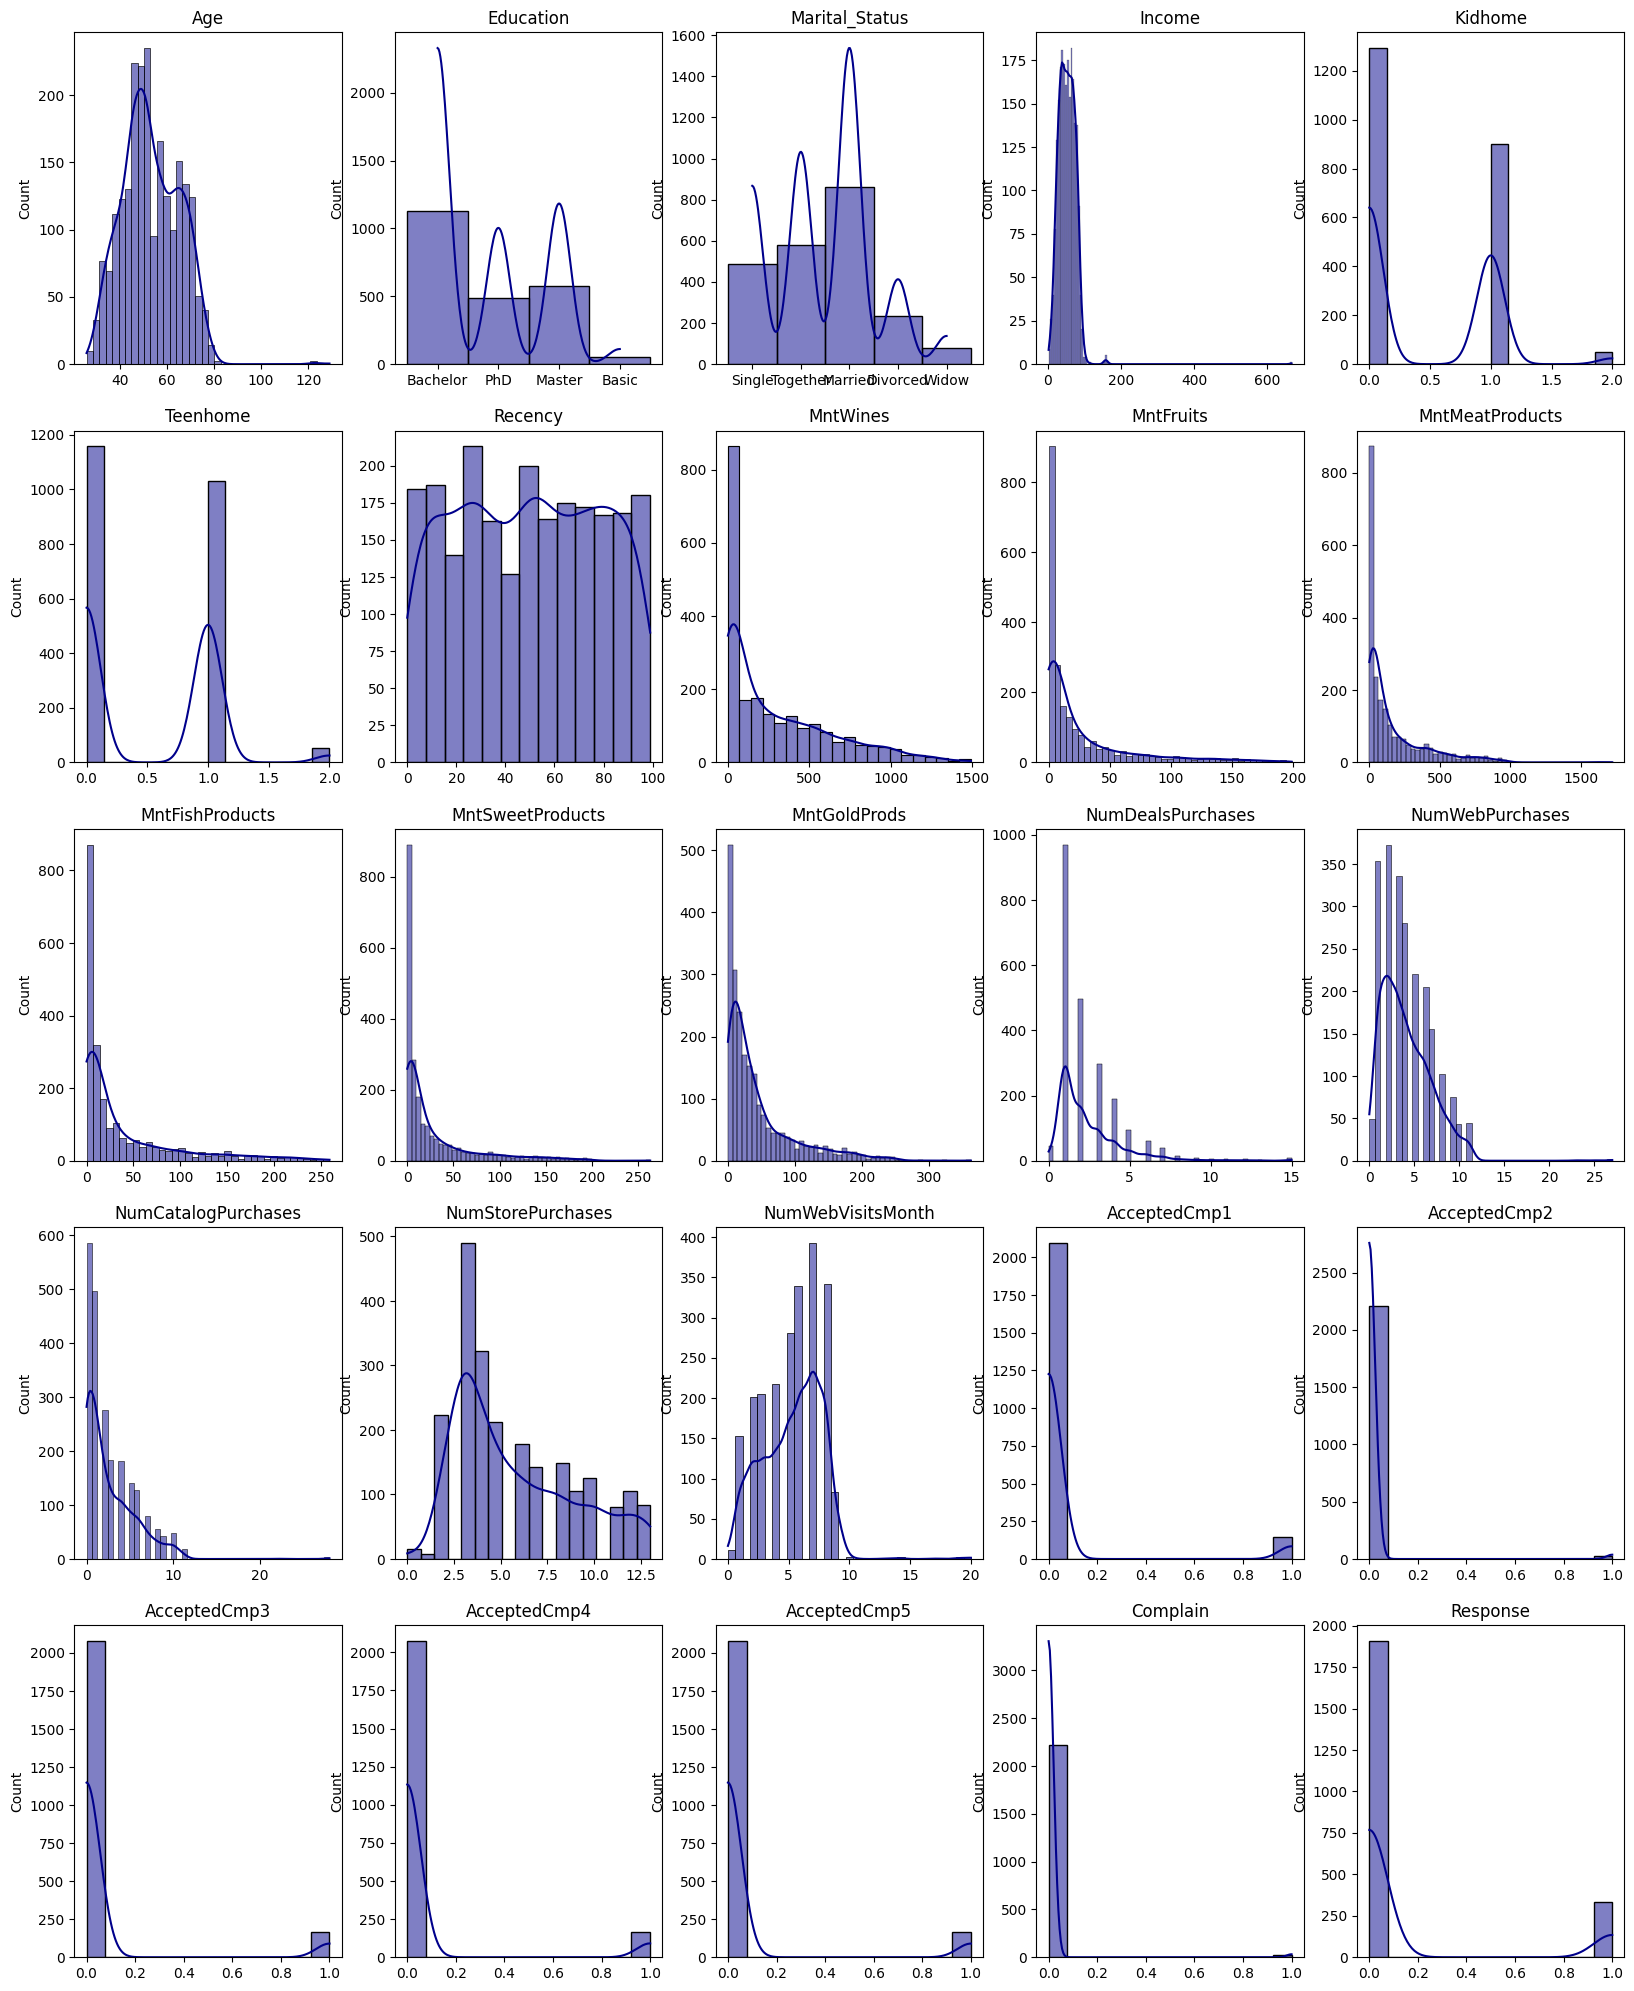

In [131]:
# plot all ordinary variable columns (14)
# Setting the number of rows and columns in the plotting grid
n_rows=5
n_cols=5

# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize = (20, 25))

for i, column in enumerate(df.columns):
    sns.histplot(df[column],ax=axes[i//n_cols,i%n_cols], 
                 kde = True, color = "darkblue").set(xlabel=None, title = column)